# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import tensorflow as tf
import random
from tensorflow.keras import layers, callbacks
from tensorflow.keras.callbacks import EarlyStopping
from matplotlib import pyplot
from sklearn.datasets import make_classification

In [5]:
#LOAD THE DATA

file_path = "/content/drive/My Drive/water_potability.csv"
df = pd.read_csv(file_path)

df = df.dropna()
X = df.drop('Potability', axis=1).values
y = df['Potability'].values
df.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


Plot the Data Appropriately

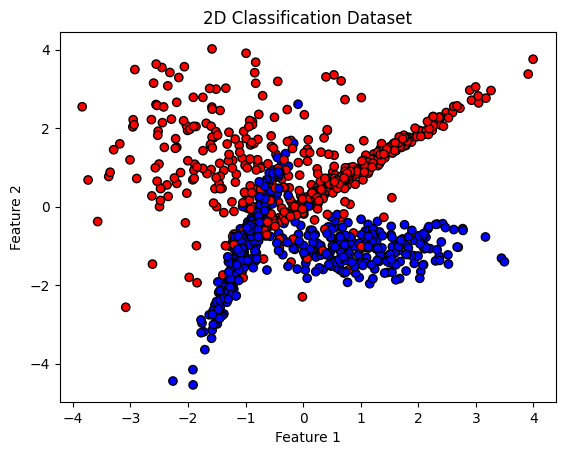

In [6]:
# Generate a dataset with 2 features and binary classes
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=2,
                           random_state=42)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolors="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("2D Classification Dataset")
plt.show()

In [7]:

# Splitting the dataset
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Print the shapes to verify
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")

Training set: (700, 2), (700,)
Validation set: (150, 2), (150,)
Testing set: (150, 2), (150,)


# Each Memeber Defines their model Here

In [8]:
# Feature scaling (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [10]:

# Define the neural network architecture
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Define input layer explicitly
    layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dropout(0.4),  # Dropout to prevent overfitting
    layers.Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dropout(0.25),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),  # Adam optimizer
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#Model Definition by member 2
def model_name_of_student():

  return

In [ ]:
#Model Definition by member 3
def model_name_of_student():

  return

# Start the training Process

In [11]:
# Early Stopping to avoid overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=7,  # Stop if val_loss doesn't improve for 7 epochs
    restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,  # Train for a maximum of 50 epochs
    batch_size=32,
    callbacks=[early_stopping]
)

# Evaluate on test data
y_pred = (model.predict(X_test) > 0.5).astype(int)




Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.6925 - loss: 0.6587 - val_accuracy: 0.8667 - val_loss: 0.5372
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8370 - loss: 0.5353 - val_accuracy: 0.8733 - val_loss: 0.4354
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8545 - loss: 0.4479 - val_accuracy: 0.8800 - val_loss: 0.3854
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8650 - loss: 0.3836 - val_accuracy: 0.8800 - val_loss: 0.3676
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8789 - loss: 0.3674 - val_accuracy: 0.8733 - val_loss: 0.3617
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8481 - loss: 0.3830 - val_accuracy: 0.8733 - val_loss: 0.3560
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8421 - loss: 0.4123 - val_accuracy: 0.8733 - val_loss: 0.3525
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8731 - loss: 0.3720 - val_accuracy: 0.8800 - val_loss

In [12]:
# Model evaluation
_, train_acc = model.evaluate(X_train, y_train, verbose=0)
_, val_acc = model.evaluate(X_val, y_val, verbose=0)
_, test_acc = model.evaluate(X_test, y_test, verbose=0)

print(f"Train Accuracy: {train_acc:.3f}")
print(f"Validation Accuracy: {val_acc:.3f}")
print(f"Test Accuracy: {test_acc:.3f}")

Train Accuracy: 0.897
Validation Accuracy: 0.887
Test Accuracy: 0.913


In [17]:
from sklearn.metrics import classification_report


report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
print(df_report)




              precision    recall  f1-score     support
0              0.897436  0.933333  0.915033   75.000000
1              0.930556  0.893333  0.911565   75.000000
accuracy       0.913333  0.913333  0.913333    0.913333
macro avg      0.913996  0.913333  0.913299  150.000000
weighted avg   0.913996  0.913333  0.913299  150.000000


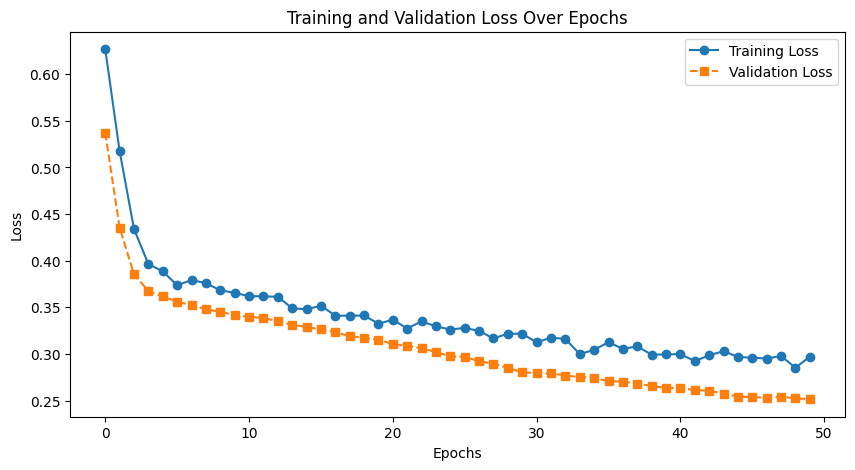

In [18]:
# Plot training & validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()


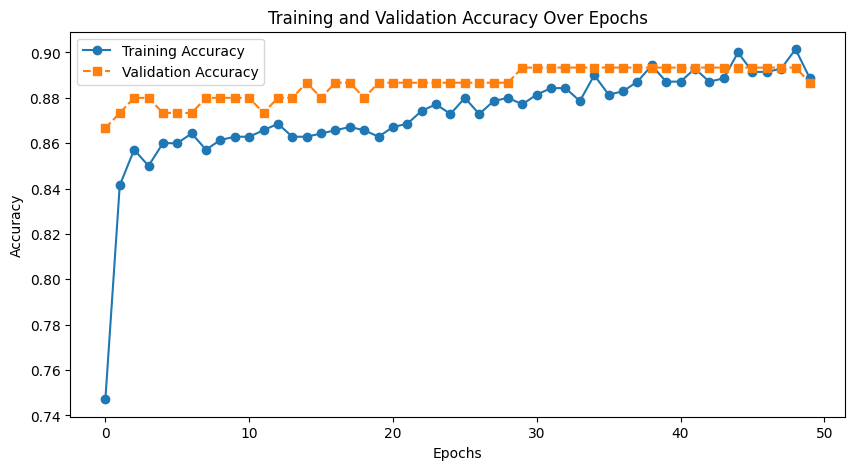

In [19]:
# Plot training & validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='dashed', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()
plt.show()

 **Training** **summary table**

| Member Name     | Regularization technique | Optimizer | Early Stopping Criteria       | Dropout Rate                   | Train Accuracy | Validation Accuracy | Test Accuracy |
|------------------|-------------|-----------|-------------------------------|--------------------------------|----------------|----------------------|---------------|
| Juliana Holder    | L2      | Adam   | Monitor: val_loss, Patience: 7 | 0.25 (Layer 1), 0.4 (Layer 2) |  0.897   | 0.887`           | *0.913*`    |

